In [14]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving train_pronto.csv to train_pronto (1).csv


In [0]:
df = pd.read_csv('train_pronto.csv')

In [16]:
df.Occupancy.value_counts(1)

0    0.768239
1    0.231761
Name: Occupancy, dtype: float64

In [0]:
df.drop(['Unnamed: 0', 'weekend'], axis = 1, inplace = True)

In [0]:
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [0]:
#normalizzazione

In [0]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
#MULTILAYER PERCEPTRON

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [25]:
clf = MLPClassifier(activation='tanh', alpha=0.0001, batch_size=250, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 25), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=200, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_train, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy 0.9874366767983789
F1-score [0.99176189 0.97354949]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3791
           1       0.95      1.00      0.97      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.98      4935
weighted avg       0.99      0.99      0.99      4935

Confusion matrix:


ValueError: ignored

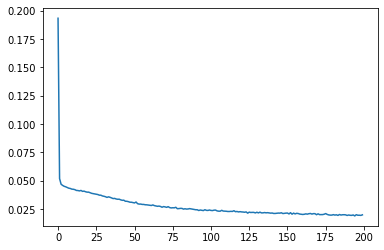

In [0]:

plt.plot(clf.loss_curve_)
plt.show()

## CON SOLVER SGD

In [0]:
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver' : 'sgd', 'learning_rate': 'constant', 'momentum': 0, 'learning_rate_init': 0.5},
          {'solver' : 'sgd', 'learning_rate': 'constant', 'momentum' : 0.9, 'learning_rate_init': 0.5, 'nesterovs_momentum': False},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.5},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver' : 'sgd', 'learning_rate': 'adaptive', 'momentum': 0, 'learning_rate_init': 0.2},
          {'solver' : 'sgd', 'learning_rate': 'adaptive', 'momentum': 0.9, 'learning_rate_init': 0.2, 'nesterovs_momentum' : False},
          {'solver' : 'sgd', 'learning_rate': 'adaptive', 'momentum': 0, 'learning_rate_init': 0.5},
          {'solver' : 'sgd', 'learning_rate': 'adaptive', 'momentum': 0.9, 'learning_rate_init': 0.5, 'nesterovs_momentum' : False}]
    
labels = ["sgd constant learning-rate 0 momentum", "sgd constant with momentum quasi max momentum","sgd constant learning rate, zero momentum learning rate >", "sgd constant with momentum max, learning rate >",
          "sgd inv-scaling learning-rate 0 momentum",  "sgd inv-scaling with max momentum","sgd inv-scaling learning-rate 0 momentum learning rate >", "sgd inv-scaling with max momentum learning rate >", "sgd adaptive min momentum", "sgd adaptive max momentum"
         "sgd adaptive min momentum learning rate >","sgd adaptive max momentum learning rate >"]

In [12]:
import warnings
from sklearn.exceptions import ConvergenceWarning
for label, param in zip(labels, params):
    print(label)
    clf = MLPClassifier(activation='tanh', alpha=0.0001, batch_size=250, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 25),
              max_fun=15000, max_iter=200,
              n_iter_no_change=50,
              power_t=0.5, random_state=0, shuffle=True,
              tol=0.0001, validation_fraction=0.2, verbose=False,
              warm_start=False, **param)

    # some parameter combinations will not converge as can be seen on the
    # plots so they are ignored here
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        clf.fit(X_train, y_train)

    print("training set score and loss: %.3f, %f" % (clf.score(X_train, y_train), clf.loss_))
    plt.plot(clf.loss_curve_, label=label)
    plt.legend(loc="upper center")
    plt.show()

NameError: ignored

## CON SOLVER lbfgs

In [0]:
params = [{'solver': 'lbfgs'}]
labels = ['lbfgs']

In [0]:
clf = MLPClassifier(activation='tanh', alpha=0.0001, batch_size=250, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 25),
              max_fun=15000, max_iter=20000,
              n_iter_no_change=50,
              power_t=0.5, random_state=0, shuffle=True,
              tol=0.0001, validation_fraction=0.2, verbose=False,
              warm_start=False, solver = 'lbfgs')
clf.fit(X_train, y_train)
print("training set score and loss: %.3f, %f" % (clf.score(X_train, y_train), clf.loss_))
plt.plot(clf.loss_curve_, label=label)
plt.legend(loc="upper center")
plt.show()

training set score and loss: 1.000, 0.000182


AttributeError: 'MLPClassifier' object has no attribute 'loss_curve_'

In [0]:
plt.plot(clf.loss_curve_)
plt.show()

AttributeError: 'MLPClassifier' object has no attribute 'loss_curve_'

In [0]:
# se non può essere settato un learning rate non ci sarà nemmeno una loss curve? può essere?

## CON ADAM

In [0]:
params = [{'solver': 'adam', 'learning_rate': 'constant', 'momentum': 0,'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver' : 'adam', 'learning_rate': 'constant', 'momentum': 0, 'learning_rate_init': 0.5},
          {'solver' : 'adam', 'learning_rate': 'constant', 'momentum' : 0.9, 'learning_rate_init': 0.5, 'nesterovs_momentum': False},
          {'solver': 'adam', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.5},
          {'solver': 'adam', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver' : 'adam', 'learning_rate': 'adaptive', 'momentum': 0, 'learning_rate_init': 0.2},
          {'solver' : 'adam', 'learning_rate': 'adaptive', 'momentum': 0.9, 'learning_rate_init': 0.2, 'nesterovs_momentum' : False},
          {'solver' : 'adam', 'learning_rate': 'adaptive', 'momentum': 0, 'learning_rate_init': 0.5},
          {'solver' : 'adam', 'learning_rate': 'adaptive', 'momentum': 0.9, 'learning_rate_init': 0.5, 'nesterovs_momentum' : False}]
    
labels = ["adam constant learning-rate 0 momentum", "adam constant with momentum quasi max momentum","adam constant learning rate, zero momentum learning rate >", "adam constant with momentum max, learning rate >",
          "adam inv-scaling learning-rate 0 momentum",  "adam inv-scaling with max momentum","adam inv-scaling learning-rate 0 momentum learning rate >", "adam inv-scaling with max momentum learning rate >", "adam adaptive min momentum", "adam adaptive max momentum"
         "adam adaptive min momentum learning rate >","adam adaptive max momentum learning rate >"]

adam constant learning-rate 0 momentum
training set score and loss: 0.990, 0.232634


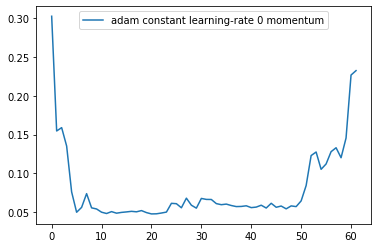

adam constant with momentum quasi max momentum
training set score and loss: 0.990, 0.232634


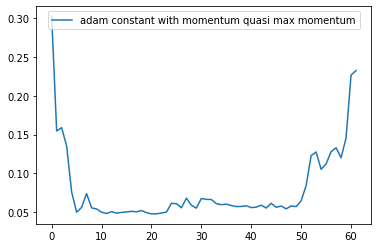

adam constant learning rate, zero momentum learning rate >
training set score and loss: 0.987, 0.618483


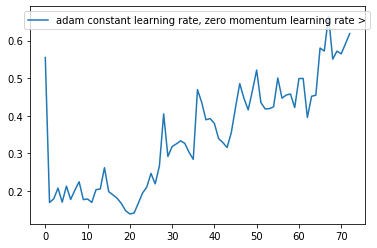

adam constant with momentum max, learning rate >
training set score and loss: 0.987, 0.618483


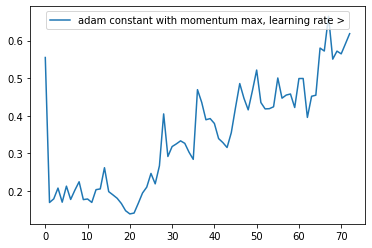

adam inv-scaling learning-rate 0 momentum
training set score and loss: 0.990, 0.232634


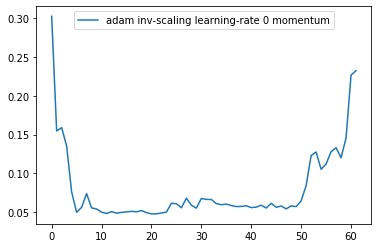

adam inv-scaling with max momentum
training set score and loss: 0.990, 0.232634


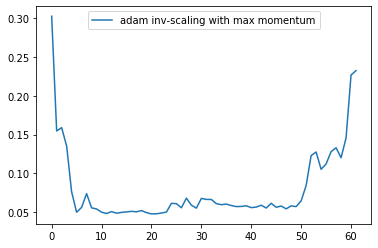

adam inv-scaling learning-rate 0 momentum learning rate >
training set score and loss: 0.987, 0.618483


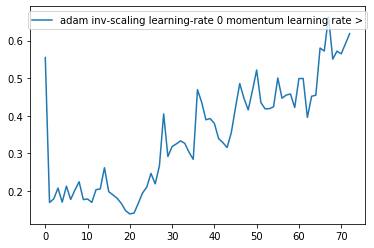

adam inv-scaling with max momentum learning rate >
training set score and loss: 0.990, 0.232634


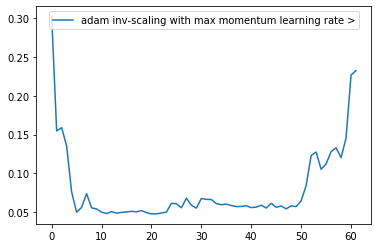

adam adaptive min momentum
training set score and loss: 0.990, 0.232634


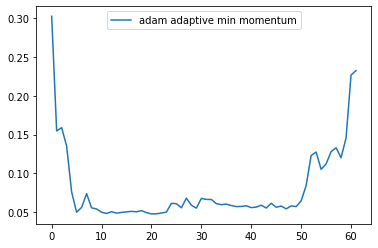

adam adaptive max momentumadam adaptive min momentum learning rate >
training set score and loss: 0.990, 0.232634


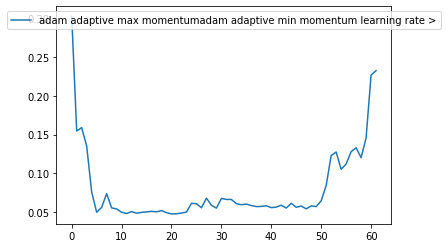

adam adaptive max momentum learning rate >
training set score and loss: 0.987, 0.618483


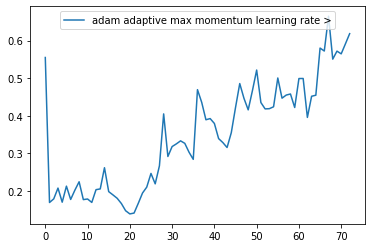

In [0]:
for label, param in zip(labels, params):
    print(label)
    clf = MLPClassifier(activation='tanh', alpha=0.0001, batch_size=250, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 25),
              max_fun=15000, max_iter=200,
              n_iter_no_change=50,
              power_t=0.5, random_state=0, shuffle=True,
              tol=0.0001, validation_fraction=0.2, verbose=False,
              warm_start=False, **param)

    # some parameter combinations will not converge as can be seen on the
    # plots so they are ignored here
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        clf.fit(X_train, y_train)

    print("training set score and loss: %.3f, %f" % (clf.score(X_train, y_train), clf.loss_))
    plt.plot(clf.loss_curve_, label=label)
    plt.legend(loc="upper center")
    plt.show()

In [0]:
# LE LOSS CURVES CON ADAM FANNO CAGARE, QUINDI DIREI DI SCARTARLO E TENERE COME SOLVER SGD

In [0]:
clf = MLPClassifier(activation='tanh', alpha=0.0001, batch_size=250, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 25), learning_rate='adaptive',
              learning_rate_init=0.2, max_fun=15000, max_iter=200,
              momentum=0, n_iter_no_change=50, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.2, verbose=False,
              warm_start=False)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9884498480243161
F1-score [0.99243329 0.97560976]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3791
           1       0.96      1.00      0.98      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.98      4935
weighted avg       0.99      0.99      0.99      4935



C:\Users\Ale\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


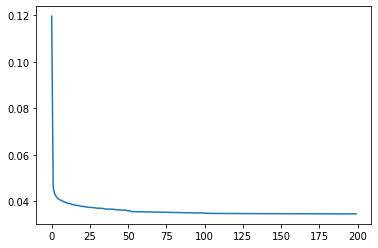

In [0]:
plt.plot(clf.loss_curve_)
plt.show()

In [24]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(1, activation='tanh'))

    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

##### PROVE CON 50 EPOCHE E DIVERSI VALORI DI BATCH SIZE (1,10,50,100,150,200,250,300,500)

In [53]:
model1 = build_model()

history1 = model1.fit(X_train, y_train, epochs=50, batch_size=1).history

Epoch 1/50
11513/11513 [==============================] - 16s 1ms/step - loss: 0.0565 - accuracy: 0.2557
Epoch 2/50
11513/11513 [==============================] - 13s 1ms/step - loss: 0.0937 - accuracy: 0.2468
Epoch 3/50
11513/11513 [==============================] - 13s 1ms/step - loss: 0.0539 - accuracy: 0.2363
Epoch 4/50
11513/11513 [==============================] - 13s 1ms/step - loss: 0.0510 - accuracy: 0.2340
Epoch 5/50
11513/11513 [==============================] - 13s 1ms/step - loss: 0.0818 - accuracy: 0.2347
Epoch 6/50
11513/11513 [==============================] - 13s 1ms/step - loss: 0.2459 - accuracy: 0.2284
Epoch 7/50
11513/11513 [==============================] - 13s 1ms/step - loss: 0.0951 - accuracy: 0.2292
Epoch 8/50
11513/11513 [==============================] - 13s 1ms/step - loss: 0.0734 - accuracy: 0.2316
Epoch 9/50
11513/11513 [==============================] - 13s 1ms/step - loss: 0.2788 - accuracy: 0.2330
Epoch 10/50
11513/11513 [==============================

In [58]:
model2 = build_model()

history2 = model2.fit(X_train, y_train, epochs=50, batch_size=10).history

Epoch 1/50
11513/11513 [==============================] - 1s 122us/step - loss: 0.0532 - accuracy: 0.3572
Epoch 2/50
11513/11513 [==============================] - 1s 117us/step - loss: 0.0465 - accuracy: 0.2913
Epoch 3/50
11513/11513 [==============================] - 1s 117us/step - loss: 0.0461 - accuracy: 0.2833
Epoch 4/50
11513/11513 [==============================] - 1s 114us/step - loss: 0.0458 - accuracy: 0.2777
Epoch 5/50
11513/11513 [==============================] - 1s 115us/step - loss: 0.0449 - accuracy: 0.2755
Epoch 6/50
11513/11513 [==============================] - 1s 118us/step - loss: 0.0451 - accuracy: 0.2689
Epoch 7/50
11513/11513 [==============================] - 1s 120us/step - loss: 0.0450 - accuracy: 0.2665
Epoch 8/50
11513/11513 [==============================] - 1s 115us/step - loss: 0.0448 - accuracy: 0.2678
Epoch 9/50
11513/11513 [==============================] - 1s 117us/step - loss: 0.0447 - accuracy: 0.2709
Epoch 10/50
11513/11513 [=====================

In [59]:
model3 = build_model()

history3 = model3.fit(X_train, y_train, epochs=50, batch_size=100).history

Epoch 1/50
11513/11513 [==============================] - 0s 21us/step - loss: 0.1194 - accuracy: 0.6939
Epoch 2/50
11513/11513 [==============================] - 0s 14us/step - loss: 0.0593 - accuracy: 0.5088
Epoch 3/50
11513/11513 [==============================] - 0s 15us/step - loss: 0.0525 - accuracy: 0.4347
Epoch 4/50
11513/11513 [==============================] - 0s 15us/step - loss: 0.0506 - accuracy: 0.3909
Epoch 5/50
11513/11513 [==============================] - 0s 13us/step - loss: 0.0491 - accuracy: 0.3645
Epoch 6/50
11513/11513 [==============================] - 0s 15us/step - loss: 0.0482 - accuracy: 0.3480
Epoch 7/50
11513/11513 [==============================] - 0s 14us/step - loss: 0.0475 - accuracy: 0.3391
Epoch 8/50
11513/11513 [==============================] - 0s 15us/step - loss: 0.0472 - accuracy: 0.3320
Epoch 9/50
11513/11513 [==============================] - 0s 14us/step - loss: 0.0469 - accuracy: 0.3257
Epoch 10/50
11513/11513 [==============================

In [60]:
model4 = build_model()

history4 = model4.fit(X_train, y_train, epochs=50, batch_size=150).history

Epoch 1/50
11513/11513 [==============================] - 0s 15us/step - loss: 0.2350 - accuracy: 0.5324
Epoch 2/50
11513/11513 [==============================] - 0s 10us/step - loss: 0.0601 - accuracy: 0.5230
Epoch 3/50
11513/11513 [==============================] - 0s 11us/step - loss: 0.0538 - accuracy: 0.4358
Epoch 4/50
11513/11513 [==============================] - 0s 11us/step - loss: 0.0520 - accuracy: 0.3942
Epoch 5/50
11513/11513 [==============================] - 0s 11us/step - loss: 0.0497 - accuracy: 0.3740
Epoch 6/50
11513/11513 [==============================] - 0s 10us/step - loss: 0.0485 - accuracy: 0.3592
Epoch 7/50
11513/11513 [==============================] - 0s 10us/step - loss: 0.0478 - accuracy: 0.3450
Epoch 8/50
11513/11513 [==============================] - 0s 11us/step - loss: 0.0473 - accuracy: 0.3338
Epoch 9/50
11513/11513 [==============================] - 0s 10us/step - loss: 0.0469 - accuracy: 0.3248
Epoch 10/50
11513/11513 [==============================

In [61]:
model5 = build_model()

history5 = model5.fit(X_train, y_train, epochs=50, batch_size=200).history

Epoch 1/50
11513/11513 [==============================] - 0s 14us/step - loss: 0.1822 - accuracy: 0.8356
Epoch 2/50
11513/11513 [==============================] - 0s 8us/step - loss: 0.0712 - accuracy: 0.6939
Epoch 3/50
11513/11513 [==============================] - 0s 10us/step - loss: 0.0597 - accuracy: 0.5902
Epoch 4/50
11513/11513 [==============================] - 0s 8us/step - loss: 0.0546 - accuracy: 0.5109
Epoch 5/50
11513/11513 [==============================] - 0s 8us/step - loss: 0.0551 - accuracy: 0.4496
Epoch 6/50
11513/11513 [==============================] - 0s 8us/step - loss: 0.0517 - accuracy: 0.4247
Epoch 7/50
11513/11513 [==============================] - 0s 8us/step - loss: 0.0500 - accuracy: 0.4158
Epoch 8/50
11513/11513 [==============================] - 0s 10us/step - loss: 0.0490 - accuracy: 0.3813
Epoch 9/50
11513/11513 [==============================] - 0s 8us/step - loss: 0.0484 - accuracy: 0.3535
Epoch 10/50
11513/11513 [==============================] - 0s

In [62]:
model6 = build_model()

history6 = model6.fit(X_train, y_train, epochs=50, batch_size=250).history

Epoch 1/50
11513/11513 [==============================] - 0s 12us/step - loss: 0.2637 - accuracy: 0.8085
Epoch 2/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0847 - accuracy: 0.7335
Epoch 3/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0675 - accuracy: 0.6745
Epoch 4/50
11513/11513 [==============================] - 0s 8us/step - loss: 0.0600 - accuracy: 0.5904
Epoch 5/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0566 - accuracy: 0.5540
Epoch 6/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0543 - accuracy: 0.5326
Epoch 7/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0525 - accuracy: 0.5039
Epoch 8/50
11513/11513 [==============================] - 0s 8us/step - loss: 0.0511 - accuracy: 0.4974
Epoch 9/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0502 - accuracy: 0.4858
Epoch 10/50
11513/11513 [==============================] - 0s 7

In [63]:
model7 = build_model()

history7 = model7.fit(X_train, y_train, epochs=50, batch_size=300).history

Epoch 1/50
11513/11513 [==============================] - 0s 12us/step - loss: 0.1155 - accuracy: 0.7056
Epoch 2/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0734 - accuracy: 0.6277
Epoch 3/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0623 - accuracy: 0.5593
Epoch 4/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0571 - accuracy: 0.5149
Epoch 5/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0544 - accuracy: 0.4505
Epoch 6/50
11513/11513 [==============================] - 0s 6us/step - loss: 0.0540 - accuracy: 0.4036
Epoch 7/50
11513/11513 [==============================] - 0s 6us/step - loss: 0.0523 - accuracy: 0.3876
Epoch 8/50
11513/11513 [==============================] - 0s 6us/step - loss: 0.0510 - accuracy: 0.3770
Epoch 9/50
11513/11513 [==============================] - 0s 6us/step - loss: 0.0501 - accuracy: 0.3698
Epoch 10/50
11513/11513 [==============================] - 0s 8

In [64]:
model8 = build_model()

history8 = model8.fit(X_train, y_train, epochs=50, batch_size=350).history

Epoch 1/50
11513/11513 [==============================] - 0s 12us/step - loss: 0.2444 - accuracy: 0.7981
Epoch 2/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0840 - accuracy: 0.6715
Epoch 3/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0693 - accuracy: 0.6051
Epoch 4/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0608 - accuracy: 0.5842
Epoch 5/50
11513/11513 [==============================] - 0s 8us/step - loss: 0.0568 - accuracy: 0.5625
Epoch 6/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0547 - accuracy: 0.5489
Epoch 7/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0527 - accuracy: 0.5134
Epoch 8/50
11513/11513 [==============================] - 0s 6us/step - loss: 0.0514 - accuracy: 0.4831
Epoch 9/50
11513/11513 [==============================] - 0s 6us/step - loss: 0.0504 - accuracy: 0.4632
Epoch 10/50
11513/11513 [==============================] - 0s 6

In [65]:
model9 = build_model()

history9 = model9.fit(X_train, y_train, epochs=50, batch_size=500).history

Epoch 1/50
11513/11513 [==============================] - 0s 11us/step - loss: 0.4040 - accuracy: 0.6945
Epoch 2/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0919 - accuracy: 0.6895
Epoch 3/50
11513/11513 [==============================] - 0s 6us/step - loss: 0.0806 - accuracy: 0.6935
Epoch 4/50
11513/11513 [==============================] - 0s 6us/step - loss: 0.0725 - accuracy: 0.6546
Epoch 5/50
11513/11513 [==============================] - 0s 6us/step - loss: 0.0668 - accuracy: 0.6013
Epoch 6/50
11513/11513 [==============================] - 0s 6us/step - loss: 0.0625 - accuracy: 0.5757
Epoch 7/50
11513/11513 [==============================] - 0s 6us/step - loss: 0.0597 - accuracy: 0.5468
Epoch 8/50
11513/11513 [==============================] - 0s 6us/step - loss: 0.0574 - accuracy: 0.5263
Epoch 9/50
11513/11513 [==============================] - 0s 6us/step - loss: 0.0556 - accuracy: 0.5107
Epoch 10/50
11513/11513 [==============================] - 0s 6

In [70]:
model10 = build_model()

history10 = model10.fit(X_train, y_train, epochs=50, batch_size=1000).history

Epoch 1/50
11513/11513 [==============================] - 0s 10us/step - loss: 2.1794 - accuracy: 0.7455
Epoch 2/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.6902 - accuracy: 0.4492
Epoch 3/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.2432 - accuracy: 0.3663
Epoch 4/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.1366 - accuracy: 0.4207
Epoch 5/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.0904 - accuracy: 0.4461
Epoch 6/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.0729 - accuracy: 0.4543
Epoch 7/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.0660 - accuracy: 0.4544
Epoch 8/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.0624 - accuracy: 0.4493
Epoch 9/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.0599 - accuracy: 0.4363
Epoch 10/50
11513/11513 [==============================] - 0s 5

In [71]:
model11 = build_model()

history11 = model11.fit(X_train, y_train, epochs=50, batch_size=1500).history

Epoch 1/50
11513/11513 [==============================] - 0s 10us/step - loss: 0.4507 - accuracy: 0.6723
Epoch 2/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1649 - accuracy: 0.7018
Epoch 3/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.1450 - accuracy: 0.6987
Epoch 4/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1327 - accuracy: 0.7007
Epoch 5/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1217 - accuracy: 0.6911
Epoch 6/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1135 - accuracy: 0.6843
Epoch 7/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1063 - accuracy: 0.6760
Epoch 8/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1001 - accuracy: 0.6673
Epoch 9/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.0946 - accuracy: 0.6613
Epoch 10/50
11513/11513 [==============================] - 0s 5

In [72]:
model12 = build_model()

history12 = model12.fit(X_train, y_train, epochs=50, batch_size=2000).history

Epoch 1/50
11513/11513 [==============================] - 0s 10us/step - loss: 2.3909 - accuracy: 0.6988
Epoch 2/50
11513/11513 [==============================] - 0s 4us/step - loss: 2.0027 - accuracy: 0.7689
Epoch 3/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.2176 - accuracy: 0.6636
Epoch 4/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1631 - accuracy: 0.5911
Epoch 5/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1442 - accuracy: 0.5436
Epoch 6/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1304 - accuracy: 0.5142
Epoch 7/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1200 - accuracy: 0.5010
Epoch 8/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1116 - accuracy: 0.4934
Epoch 9/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1046 - accuracy: 0.4854
Epoch 10/50
11513/11513 [==============================] - 0s 4

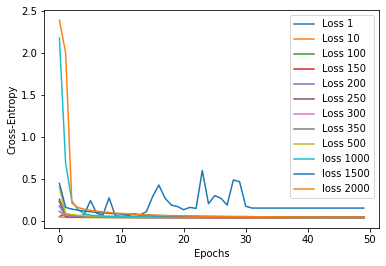

In [73]:
plt.plot(history1['loss'], label='Loss 1')
plt.plot(history2['loss'], label='Loss 10')
plt.plot(history3['loss'], label='Loss 100')
plt.plot(history4['loss'], label='Loss 150')
plt.plot(history5['loss'], label='Loss 200')
plt.plot(history6['loss'], label='Loss 250')
plt.plot(history7['loss'], label='Loss 300')
plt.plot(history8['loss'], label='Loss 350')
plt.plot(history9['loss'], label='Loss 500')
plt.plot(history10['loss'], label = 'loss 1000')
plt.plot(history11['loss'], label = 'loss 1500')
plt.plot(history12['loss'], label = 'loss 2000')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

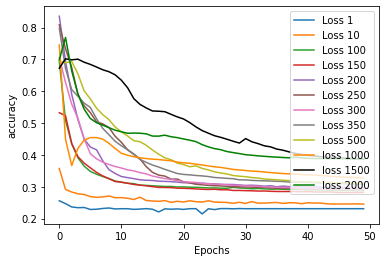

In [77]:
plt.plot(history1['accuracy'], label='Loss 1')
plt.plot(history2['accuracy'], label='Loss 10')
plt.plot(history3['accuracy'], label='Loss 100')
plt.plot(history4['accuracy'], label='Loss 150')
plt.plot(history5['accuracy'], label='Loss 200')
plt.plot(history6['accuracy'], label='Loss 250')
plt.plot(history7['accuracy'], label='Loss 300')
plt.plot(history8['accuracy'], label='Loss 350')
plt.plot(history9['accuracy'], label='Loss 500')
plt.plot(history10['accuracy'], label = 'loss 1000', color = 'darkorange')
plt.plot(history11['accuracy'], label = 'loss 1500', color = 'black')
plt.plot(history12['accuracy'], label = 'loss 2000', color = 'green')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [78]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test)
test_loss_2, test_acc_2 = model2.evaluate(X_test, y_test)
test_loss_3, test_acc_3 = model3.evaluate(X_test, y_test)
test_loss_4, test_acc_4 = model4.evaluate(X_test, y_test)
test_loss_5, test_acc_5 = model5.evaluate(X_test, y_test)
test_loss_6, test_acc_6 = model6.evaluate(X_test, y_test)
test_loss_7, test_acc_7 = model7.evaluate(X_test, y_test)
test_loss_8, test_acc_8 = model8.evaluate(X_test, y_test)
test_loss_9, test_acc_9 = model9.evaluate(X_test, y_test)
test_loss_10, test_acc_10 = model10.evaluate(X_test, y_test)
test_loss_11, test_acc_11 = model11.evaluate(X_test, y_test)
test_loss_12, test_acc_12 = model12.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
print('Loss %f, Accuracy %f' % (test_loss_4, test_acc_4))
print('Loss %f, Accuracy %f' % (test_loss_5, test_acc_5))
print('Loss %f, Accuracy %f' % (test_loss_6, test_acc_6))
print('Loss %f, Accuracy %f' % (test_loss_7, test_acc_7))
print('Loss %f, Accuracy %f' % (test_loss_8, test_acc_8))
print('Loss %f, Accuracy %f' % (test_loss_9, test_acc_9))
print('Loss %f, Accuracy %f' % (test_loss_10, test_acc_10))
print('Loss %f, Accuracy %f' % (test_loss_11, test_acc_11))
print('Loss %f, Accuracy %f' % (test_loss_12, test_acc_12))

4935/4935 [==============================] - 0s 22us/step
Loss 0.167538, Accuracy 0.230800
Loss 0.045317, Accuracy 0.247416
Loss 0.051360, Accuracy 0.282877
Loss 0.051329, Accuracy 0.277812
Loss 0.051513, Accuracy 0.290983
Loss 0.052169, Accuracy 0.285106
Loss 0.052296, Accuracy 0.285309
Loss 0.052373, Accuracy 0.299291
Loss 0.052985, Accuracy 0.303951
Loss 0.053778, Accuracy 0.317730
Loss 0.055525, Accuracy 0.380142
Loss 0.058299, Accuracy 0.382573


In [0]:
modelli = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12]

In [80]:
modelli

In [82]:
for model in modelli:
  y_pred = model.predict(X_test).astype(int)
  print('MODELLO', model)
  print('Accuracy %s' % accuracy_score(y_test, y_pred))
  print('F1-score %s' % f1_score(y_test, y_pred, average=None))
  print(classification_report(y_test, y_pred))

MODELLO <keras.engine.sequential.Sequential object at 0x7fc005a77cc0>
Accuracy 0.23181357649442755
F1-score [0.         0.0042072  0.97552598]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.67      0.00      0.00      3791
           1       0.96      0.99      0.98      1144

    accuracy                           0.23      4935
   macro avg       0.54      0.33      0.33      4935
weighted avg       0.73      0.23      0.23      4935

MODELLO <keras.engine.sequential.Sequential object at 0x7fc005c75470>
Accuracy 0.7681864235055724
F1-score [0.86889755 0.        ]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3791
           1       0.00      0.00      0.00      1144

    accuracy                           0.77      4935
   macro avg       0.38      0.50      0.43      4935
weighted avg       0.59      0.77      0.67      4935

MODELLO <keras.eng

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3791
           1       0.00      0.00      0.00      1144

    accuracy                           0.77      4935
   macro avg       0.38      0.50      0.43      4935
weighted avg       0.59      0.77      0.67      4935

MODELLO <keras.engine.sequential.Sequential object at 0x7fc00627a470>
Accuracy 0.7681864235055724
F1-score [0.86889755 0.        ]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3791
           1       0.00      0.00      0.00      1144

    accuracy                           0.77      4935
   macro avg       0.38      0.50      0.43      4935
weighted avg       0.59      0.77      0.67      4935

MODELLO <keras.engine.sequential.Sequential object at 0x7fc005b29f98>
Accuracy 0.7681864235055724
F1-score [0.86889755 0.        ]
              precision    recall  f1-score   support

           0       0.77      

In [0]:
y_pred = model1.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [0]:
### CAMBIANDO OPTIMIZER DEL MODELLO

In [0]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(1, activation='tanh'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [85]:
model1 = build_model()

history1 = model1.fit(X_train, y_train, epochs=50, batch_size=1).history

Epoch 1/50
11513/11513 [==============================] - 14s 1ms/step - loss: 0.0636 - accuracy: 0.2502
Epoch 2/50
11513/11513 [==============================] - 15s 1ms/step - loss: 0.0508 - accuracy: 0.2350
Epoch 3/50
11513/11513 [==============================] - 14s 1ms/step - loss: 0.0595 - accuracy: 0.2321
Epoch 4/50
11513/11513 [==============================] - 14s 1ms/step - loss: 0.0514 - accuracy: 0.2332
Epoch 5/50
11513/11513 [==============================] - 14s 1ms/step - loss: 0.0577 - accuracy: 0.2313
Epoch 6/50
11513/11513 [==============================] - 14s 1ms/step - loss: 0.0514 - accuracy: 0.2314
Epoch 7/50
11513/11513 [==============================] - 14s 1ms/step - loss: 0.0497 - accuracy: 0.2329
Epoch 8/50
11513/11513 [==============================] - 14s 1ms/step - loss: 0.0473 - accuracy: 0.2343
Epoch 9/50
11513/11513 [==============================] - 14s 1ms/step - loss: 0.0398 - accuracy: 0.2335
Epoch 10/50
11513/11513 [==============================

In [86]:
model2 = build_model()

history2 = model2.fit(X_train, y_train, epochs=50, batch_size=10).history

Epoch 1/50
11513/11513 [==============================] - 2s 132us/step - loss: 0.0583 - accuracy: 0.3163
Epoch 2/50
11513/11513 [==============================] - 1s 125us/step - loss: 0.0511 - accuracy: 0.2530
Epoch 3/50
11513/11513 [==============================] - 1s 125us/step - loss: 0.0465 - accuracy: 0.2450
Epoch 4/50
11513/11513 [==============================] - 1s 126us/step - loss: 0.0505 - accuracy: 0.2462
Epoch 5/50
11513/11513 [==============================] - 1s 124us/step - loss: 0.0438 - accuracy: 0.2437
Epoch 6/50
11513/11513 [==============================] - 1s 122us/step - loss: 0.0421 - accuracy: 0.2465
Epoch 7/50
11513/11513 [==============================] - 1s 127us/step - loss: 0.0417 - accuracy: 0.2472
Epoch 8/50
11513/11513 [==============================] - 1s 126us/step - loss: 0.0415 - accuracy: 0.2420
Epoch 9/50
11513/11513 [==============================] - 1s 128us/step - loss: 0.0393 - accuracy: 0.2442
Epoch 10/50
11513/11513 [=====================

In [87]:
model3 = build_model()

history3 = model3.fit(X_train, y_train, epochs=50, batch_size=100).history

Epoch 1/50
11513/11513 [==============================] - 0s 24us/step - loss: 0.0844 - accuracy: 0.5086
Epoch 2/50
11513/11513 [==============================] - 0s 16us/step - loss: 0.0475 - accuracy: 0.3905
Epoch 3/50
11513/11513 [==============================] - 0s 17us/step - loss: 0.0466 - accuracy: 0.3181
Epoch 4/50
11513/11513 [==============================] - 0s 15us/step - loss: 0.0460 - accuracy: 0.2960
Epoch 5/50
11513/11513 [==============================] - 0s 16us/step - loss: 0.0469 - accuracy: 0.2914
Epoch 6/50
11513/11513 [==============================] - 0s 15us/step - loss: 0.0455 - accuracy: 0.2820
Epoch 7/50
11513/11513 [==============================] - 0s 16us/step - loss: 0.0467 - accuracy: 0.2740
Epoch 8/50
11513/11513 [==============================] - 0s 16us/step - loss: 0.0461 - accuracy: 0.2775
Epoch 9/50
11513/11513 [==============================] - 0s 16us/step - loss: 0.0456 - accuracy: 0.2700
Epoch 10/50
11513/11513 [==============================

In [88]:
model4 = build_model()

history4 = model4.fit(X_train, y_train, epochs=50, batch_size=150).history

Epoch 1/50
11513/11513 [==============================] - 0s 19us/step - loss: 0.1938 - accuracy: 0.3878
Epoch 2/50
11513/11513 [==============================] - 0s 11us/step - loss: 0.0478 - accuracy: 0.3363
Epoch 3/50
11513/11513 [==============================] - 0s 11us/step - loss: 0.0467 - accuracy: 0.3111
Epoch 4/50
11513/11513 [==============================] - 0s 11us/step - loss: 0.0462 - accuracy: 0.2998
Epoch 5/50
11513/11513 [==============================] - 0s 11us/step - loss: 0.0632 - accuracy: 0.3117
Epoch 6/50
11513/11513 [==============================] - 0s 11us/step - loss: 0.0516 - accuracy: 0.2673
Epoch 7/50
11513/11513 [==============================] - 0s 11us/step - loss: 0.0473 - accuracy: 0.2665
Epoch 8/50
11513/11513 [==============================] - 0s 11us/step - loss: 0.0466 - accuracy: 0.2715
Epoch 9/50
11513/11513 [==============================] - 0s 11us/step - loss: 0.0466 - accuracy: 0.2753
Epoch 10/50
11513/11513 [==============================

In [89]:
model5 = build_model()

history5 = model5.fit(X_train, y_train, epochs=50, batch_size=200).history

Epoch 1/50
11513/11513 [==============================] - 0s 17us/step - loss: 0.2222 - accuracy: 0.4650
Epoch 2/50
11513/11513 [==============================] - 0s 9us/step - loss: 0.0486 - accuracy: 0.3755
Epoch 3/50
11513/11513 [==============================] - 0s 9us/step - loss: 0.0471 - accuracy: 0.3260
Epoch 4/50
11513/11513 [==============================] - 0s 9us/step - loss: 0.0464 - accuracy: 0.3077
Epoch 5/50
11513/11513 [==============================] - 0s 9us/step - loss: 0.0462 - accuracy: 0.2988
Epoch 6/50
11513/11513 [==============================] - 0s 9us/step - loss: 0.0457 - accuracy: 0.2947
Epoch 7/50
11513/11513 [==============================] - 0s 9us/step - loss: 0.0463 - accuracy: 0.2939
Epoch 8/50
11513/11513 [==============================] - 0s 8us/step - loss: 0.0458 - accuracy: 0.2911
Epoch 9/50
11513/11513 [==============================] - 0s 8us/step - loss: 0.0455 - accuracy: 0.2920
Epoch 10/50
11513/11513 [==============================] - 0s 9

In [90]:
model6 = build_model()

history6 = model6.fit(X_train, y_train, epochs=50, batch_size=250).history

Epoch 1/50
11513/11513 [==============================] - 0s 17us/step - loss: 0.1675 - accuracy: 0.5305
Epoch 2/50
11513/11513 [==============================] - 0s 8us/step - loss: 0.0508 - accuracy: 0.4965
Epoch 3/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0480 - accuracy: 0.4035
Epoch 4/50
11513/11513 [==============================] - 0s 8us/step - loss: 0.0472 - accuracy: 0.3532
Epoch 5/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0468 - accuracy: 0.3305
Epoch 6/50
11513/11513 [==============================] - 0s 8us/step - loss: 0.0462 - accuracy: 0.3112
Epoch 7/50
11513/11513 [==============================] - 0s 8us/step - loss: 0.0459 - accuracy: 0.3016
Epoch 8/50
11513/11513 [==============================] - 0s 8us/step - loss: 0.0459 - accuracy: 0.2977
Epoch 9/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0456 - accuracy: 0.2951
Epoch 10/50
11513/11513 [==============================] - 0s 8

In [91]:
model7 = build_model()

history7 = model7.fit(X_train, y_train, epochs=50, batch_size=300).history

Epoch 1/50
11513/11513 [==============================] - 0s 16us/step - loss: 0.4126 - accuracy: 0.4563
Epoch 2/50
11513/11513 [==============================] - 0s 8us/step - loss: 0.0519 - accuracy: 0.3672
Epoch 3/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0479 - accuracy: 0.3190
Epoch 4/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0469 - accuracy: 0.3097
Epoch 5/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0468 - accuracy: 0.2983
Epoch 6/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0463 - accuracy: 0.2973
Epoch 7/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0476 - accuracy: 0.3019
Epoch 8/50
11513/11513 [==============================] - 0s 6us/step - loss: 0.0459 - accuracy: 0.2971
Epoch 9/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0458 - accuracy: 0.2944
Epoch 10/50
11513/11513 [==============================] - 0s 7

In [92]:
model8 = build_model()

history8 = model8.fit(X_train, y_train, epochs=50, batch_size=350).history

Epoch 1/50
11513/11513 [==============================] - 0s 18us/step - loss: 0.4817 - accuracy: 0.5047
Epoch 2/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0945 - accuracy: 0.4562
Epoch 3/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0557 - accuracy: 0.4993
Epoch 4/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0514 - accuracy: 0.4835
Epoch 5/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0497 - accuracy: 0.4683
Epoch 6/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0486 - accuracy: 0.4342
Epoch 7/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0479 - accuracy: 0.4182
Epoch 8/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0473 - accuracy: 0.3950
Epoch 9/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0469 - accuracy: 0.3749
Epoch 10/50
11513/11513 [==============================] - 0s 7

In [93]:
model9 = build_model()

history9 = model9.fit(X_train, y_train, epochs=50, batch_size=500).history

Epoch 1/50
11513/11513 [==============================] - 0s 15us/step - loss: 0.2793 - accuracy: 0.4980
Epoch 2/50
11513/11513 [==============================] - 0s 6us/step - loss: 0.0628 - accuracy: 0.3647
Epoch 3/50
11513/11513 [==============================] - 0s 6us/step - loss: 0.0502 - accuracy: 0.3556
Epoch 4/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0478 - accuracy: 0.3419
Epoch 5/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0483 - accuracy: 0.3218
Epoch 6/50
11513/11513 [==============================] - 0s 6us/step - loss: 0.0468 - accuracy: 0.3118
Epoch 7/50
11513/11513 [==============================] - 0s 7us/step - loss: 0.0476 - accuracy: 0.3096
Epoch 8/50
11513/11513 [==============================] - 0s 6us/step - loss: 0.0479 - accuracy: 0.2935
Epoch 9/50
11513/11513 [==============================] - 0s 6us/step - loss: 0.0463 - accuracy: 0.2984
Epoch 10/50
11513/11513 [==============================] - 0s 6

In [94]:
model10 = build_model()

history10 = model10.fit(X_train, y_train, epochs=50, batch_size=1000).history

Epoch 1/50
11513/11513 [==============================] - 0s 14us/step - loss: 0.3471 - accuracy: 0.7173
Epoch 2/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.1026 - accuracy: 0.4309
Epoch 3/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.0571 - accuracy: 0.4613
Epoch 4/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.0514 - accuracy: 0.5275
Epoch 5/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.0496 - accuracy: 0.4725
Epoch 6/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.0484 - accuracy: 0.4114
Epoch 7/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.0478 - accuracy: 0.3624
Epoch 8/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.0475 - accuracy: 0.3561
Epoch 9/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.0472 - accuracy: 0.3290
Epoch 10/50
11513/11513 [==============================] - 0s 5

In [95]:
model11 = build_model()

history11 = model11.fit(X_train, y_train, epochs=50, batch_size=1500).history

Epoch 1/50
11513/11513 [==============================] - 0s 13us/step - loss: 1.1950 - accuracy: 0.6989
Epoch 2/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.2042 - accuracy: 0.5313
Epoch 3/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.1813 - accuracy: 0.4403
Epoch 4/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1328 - accuracy: 0.4537
Epoch 5/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.0926 - accuracy: 0.4621
Epoch 6/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.0706 - accuracy: 0.4718
Epoch 7/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.0611 - accuracy: 0.5174
Epoch 8/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.0577 - accuracy: 0.5715
Epoch 9/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.0560 - accuracy: 0.5693
Epoch 10/50
11513/11513 [==============================] - 0s 4

In [96]:
model12 = build_model()

history12 = model12.fit(X_train, y_train, epochs=50, batch_size=2000).history

Epoch 1/50
11513/11513 [==============================] - 0s 13us/step - loss: 0.9156 - accuracy: 0.7284
Epoch 2/50
11513/11513 [==============================] - 0s 5us/step - loss: 0.1674 - accuracy: 0.6084
Epoch 3/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1748 - accuracy: 0.5771
Epoch 4/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1872 - accuracy: 0.5673
Epoch 5/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1916 - accuracy: 0.5581
Epoch 6/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1897 - accuracy: 0.5570
Epoch 7/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1843 - accuracy: 0.5605
Epoch 8/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1762 - accuracy: 0.5616
Epoch 9/50
11513/11513 [==============================] - 0s 4us/step - loss: 0.1670 - accuracy: 0.5551
Epoch 10/50
11513/11513 [==============================] - 0s 4

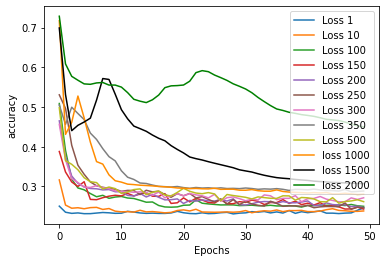

In [97]:
plt.plot(history1['accuracy'], label='Loss 1')
plt.plot(history2['accuracy'], label='Loss 10')
plt.plot(history3['accuracy'], label='Loss 100')
plt.plot(history4['accuracy'], label='Loss 150')
plt.plot(history5['accuracy'], label='Loss 200')
plt.plot(history6['accuracy'], label='Loss 250')
plt.plot(history7['accuracy'], label='Loss 300')
plt.plot(history8['accuracy'], label='Loss 350')
plt.plot(history9['accuracy'], label='Loss 500')
plt.plot(history10['accuracy'], label = 'loss 1000', color = 'darkorange')
plt.plot(history11['accuracy'], label = 'loss 1500', color = 'black')
plt.plot(history12['accuracy'], label = 'loss 2000', color = 'green')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

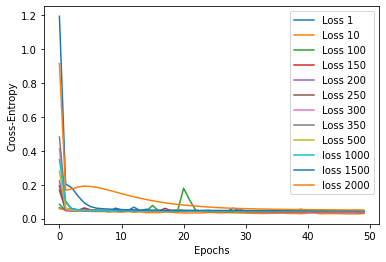

In [98]:
plt.plot(history1['loss'], label='Loss 1')
plt.plot(history2['loss'], label='Loss 10')
plt.plot(history3['loss'], label='Loss 100')
plt.plot(history4['loss'], label='Loss 150')
plt.plot(history5['loss'], label='Loss 200')
plt.plot(history6['loss'], label='Loss 250')
plt.plot(history7['loss'], label='Loss 300')
plt.plot(history8['loss'], label='Loss 350')
plt.plot(history9['loss'], label='Loss 500')
plt.plot(history10['loss'], label = 'loss 1000')
plt.plot(history11['loss'], label = 'loss 1500')
plt.plot(history12['loss'], label = 'loss 2000')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [99]:
for model in modelli:
  y_pred = model.predict(X_test).astype(int)
  print('MODELLO', model)
  print('Accuracy %s' % accuracy_score(y_test, y_pred))
  print('F1-score %s' % f1_score(y_test, y_pred, average=None))
  print(classification_report(y_test, y_pred))

MODELLO <keras.engine.sequential.Sequential object at 0x7fc005a77cc0>
Accuracy 0.23181357649442755
F1-score [0.         0.0042072  0.97552598]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.67      0.00      0.00      3791
           1       0.96      0.99      0.98      1144

    accuracy                           0.23      4935
   macro avg       0.54      0.33      0.33      4935
weighted avg       0.73      0.23      0.23      4935

MODELLO <keras.engine.sequential.Sequential object at 0x7fc005c75470>
Accuracy 0.7681864235055724
F1-score [0.86889755 0.        ]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3791
           1       0.00      0.00      0.00      1144

    accuracy                           0.77      4935
   macro avg       0.38      0.50      0.43      4935
weighted avg       0.59      0.77      0.67      4935

MODELLO <keras.eng

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MODELLO <keras.engine.sequential.Sequential object at 0x7fc00627a470>
Accuracy 0.7681864235055724
F1-score [0.86889755 0.        ]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3791
           1       0.00      0.00      0.00      1144

    accuracy                           0.77      4935
   macro avg       0.38      0.50      0.43      4935
weighted avg       0.59      0.77      0.67      4935

MODELLO <keras.engine.sequential.Sequential object at 0x7fc005b29f98>
Accuracy 0.7681864235055724
F1-score [0.86889755 0.        ]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3791
           1       0.00      0.00      0.00      1144

    accuracy                           0.77      4935
   macro avg       0.38      0.50      0.43      4935
weighted avg       0.59      0.77      0.67      4935

MODELLO <keras.engine.sequential.Sequential object at 0x7fc00575fc88>
Accuracy 0.768

## ROC CURVE

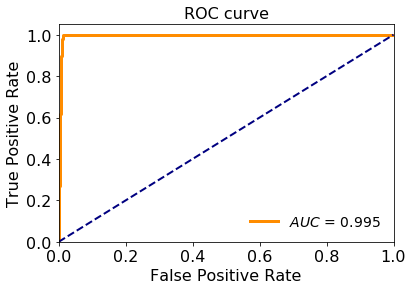

In [0]:
y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=3, label='$AUC$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

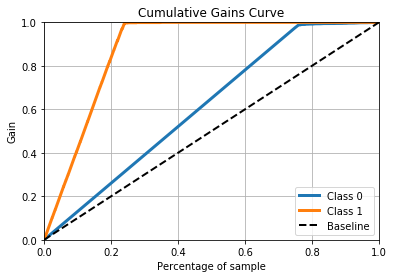

In [0]:
plot_cumulative_gain(y_test, y_score)
plt.show()

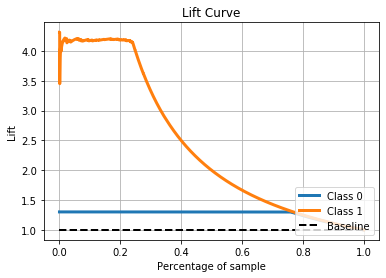

In [0]:
plot_lift_curve(y_test, y_score)
plt.show()